# **Problem Statement**

- **Context and Company Background:** TechWorks Consulting specializes in IT talent recruitment, uniquely connecting skilled professionals with the right job opportunities. Our deep industry knowledge and strong network help us ensure a perfect match for both candidates and companies, fostering successful partnerships in the tech sectorr.


- **Data Description:** The dataset contains information about colleges, cities, roles, previous experience, and salary. This data will be used to train and test the predictive model, helping us gain insights into trends and making informed decisions.

- **Regression Task:** The primary objective is to perform a regression task, where the aim is to predict a continuous variable, specifically the salary of newly hired employees.

- **Role of Statistics:** Statistics play a crucial role in building and validating the accuracy of the model. By applying statistical methods, we can analyze data patterns, assess model performance, and ensure that our predictions are reliable and meaningful.

- **Data Preprocessing:** Data preprocessing is a critical task that involves handling missing values, addressing outliers, encoding categorical variables, normalizing data, and selecting relevant features. These steps are essential for preparing the data, ensuring its quality, and enhancing the performance of the predictive model.

# Creating a Salary Prediction Model: A Systematic Approach

**Data Understanding:**
*Begin by thoroughly examining the provided dataset, including its structure and columns.
Interpret the meaning of each variable, and gain insights into data distribution, summary statistics, and potential outliers.

**Data Preprocessing:**
- **Handle Missing Values:** Identify and address missing data through imputation or removal to ensure data completeness.
- **Outlier Detection and Treatment:** Detect and manage outliers that could negatively impact the model's accuracy.
-**Convert Categorical Data:** Transform categorical variables (e.g., "College" and "City") into numerical formats to facilitate analysis.
-**Normalize Data:** Normalize numerical features to bring them to a common scale, preventing any single feature from dominating the model.
-**Feature Selection:** Utilize statistical techniques such as Lasso, Ridge regression, or correlation analysis to identify the most relevant features for salary prediction.

**Performing Exploratory Data Analysis (EDA)**
* Conduct EDA to visualize data distributions, relationships between variables, and any trends that may inform model development.

**Model Selection:**
* Choose various regression models (e.g., Linear Regression, Multiple Linear Regression) to build and evaluate predictive capabilities.

**Model Training and Evaluation:**
* Split the dataset into training and testing sets for effective model training and performance assessment.
* Use evaluation metrics like Mean Squared Error (MSE), R-squared, and Mean Absolute Error (MAE) to gauge model accuracy.
* Experiment with different hyperparameters and employ cross-validation to prevent overfitting.


**Model Comparison:**
* Compare the performance of different models, selecting the one that demonstrates the best accuracy and generalization capabilities.


**Further Improvement:**
* Explore additional techniques for enhancing model performance, such as feature engineering, hyperparameter tuning, and ensemble methods.

# Available ML Model Options

**In the task of predicting employee salaries at TechWorks Consulting, several machine learning models can be utilized for regression tasks. The choice of model depends on various factors, including data characteristics, problem complexity, and the need for model interpretability. Here are some of the available ML model options:**

**1. Linear Regression** 
* Linear regression is a simple and interpretable model that assumes a linear relationship between the features and the target variable (salary). It's a good starting point and can provide baseline performance.

**2. Ridge Regression and Lasso Regression**
* Ridge and Lasso regression are regularization techniques designed to handle multicollinearity and prevent overfitting. These variants of linear regression incorporate regularization terms into the cost function to improve model robustness.

**3. Decision Trees**
* Decision tree-based models, such as Random Forest and Gradient Boosting, excel at capturing non-linear relationships in the data. They can accommodate both numerical and categorical features and automatically assess feature importance.

**4. K-Nearest Neighbors (KNN)**
* KNN is a non-parametric method that makes predictions based on the average of the 'k' nearest data points. It can be particularly effective for small to medium-sized datasets.

**5. Polynomial Regression**
* Polynomial regression extends linear regression by introducing polynomial features, allowing it to capture non-linear relationships.

For this analysis, I will focus on three of these models. I will evaluate their performance using default parameters and will also experiment with adjusting certain parameters to optimize their effectiveness.

In [133]:
# Import the pandas library for data manipulation and analysis
# Import the numpy library for numerical operations and array processing 
# Import the seaborn library for data visualization

import pandas as pd  
import numpy as np   
import seaborn as sns   

In [134]:
# Read a CSV file into a DataFrame for the main dataset
df = pd.read_csv(r'C:\Users\win10\OneDrive\Desktop\Intershala assignment\Machine Learing\project\ML case Study.csv')

# Read a CSV file into a DataFrame for college information
college = pd.read_csv(r'C:\Users\win10\OneDrive\Desktop\Intershala assignment\Machine Learing\project\Colleges (1).csv')

# Read a CSV file into a DataFrame for city information
cities = pd.read_csv(r'C:\Users\win10\OneDrive\Desktop\Intershala assignment\Machine Learing\project\cities.csv')

In [135]:
df.head()   # Overview of Data

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
0,SVNIT Surat,Asansol,Manager,55523.0,3,66,19,71406.58
1,NIT Bhopal,Ajmer,Executive,57081.0,1,84,18,68005.87
2,"IEM, Kolkata",Rajpur Sonarpur,Executive,60347.0,2,52,28,76764.02
3,"KIIT, Bhubaneswar",Ajmer,Executive,49010.0,2,81,33,82092.39
4,DTU,Durgapur,Executive,57879.0,4,74,32,73878.10


In [136]:
college.head()   # Overview of College data

,Tier 1,Tier 2,Tier 3
0,IIT Bombay,IIIT Bangalore,"Ramaiah Institute of Technology, Bengaluru"
1,IIT Delhi,IIIT Delhi,TIET/Thapar University
2,IIT Kharagpur,IGDTUW,Manipal Main Campus
3,IIT Madras,NIT Calicut,VIT Vellore
4,IIT Kanpur,IIITM Gwalior,SRM Main Campus


In [137]:
cities.head()   # Overview of City data

,Metrio City,non-metro cities
0,Mumbai,Dehradun
1,Delhi,Durgapur
2,Kolkata,Asansol
3,Chennai,Rourkela
4,Bangalore,Kozhikode


In [138]:
# Extract data from the "Tier 1," "Tier 2," and "Tier 3" columns of the 'college' DataFrame
# and store them in separate lists 'Tier1,' 'Tier2,' and 'Tier3' for further analysis.

Tier1 = college["Tier 1"].tolist()
Tier2 = college["Tier 2"].tolist()
Tier3 = college["Tier 3"].tolist()

In [139]:
Tier1   # Printing the data contained in Tier1

['IIT Bombay',
 'IIT Delhi',
 'IIT Kharagpur',
 'IIT Madras',
 'IIT Kanpur',
 'IIT Roorkee',
 'IIT Guwahati',
 'IIIT Hyderabad',
 'BITS Pilani (Pilani Campus)',
 'IIT Indore',
 'IIT Ropar',
 'IIT BHU (Varanasi)',
 'IIT ISM Dhanbad',
 'DTU',
 'NSUT Delhi (NSIT)',
 'NIT Tiruchipally (Trichy)',
 'NIT Warangal',
 'NIT Surathkal (Karnataka)',
 'Jadavpur University',
 'BITS Pilani (Hyderabad Campus)',
 'BITS Pilani (Goa Campus)',
 'IIIT Allahabad',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan]

In [140]:
# Assign tier values based on the tier classification
# - If a college is in 'Tier1', set its value to 3
# - If a college is in 'Tier2', set its value to 2
# - If a college is in 'Tier3', set its value to 1
# Tier1 college get value of 3 and tier 3 of 1 because tier1 college has higher weightage then 2 and 3

for item in df.College:
    if item in Tier1:
        df["College"].replace(item,3,inplace=True)
    elif item in Tier2:
        df["College"].replace(item,2,inplace=True)
    elif item in Tier3:
        df["College"].replace(item,1,inplace=True)

In [141]:
df.head()    # Overview of Data

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
0,2,Asansol,Manager,55523.0,3,66,19,71406.58
1,2,Ajmer,Executive,57081.0,1,84,18,68005.87
2,1,Rajpur Sonarpur,Executive,60347.0,2,52,28,76764.02
3,1,Ajmer,Executive,49010.0,2,81,33,82092.39
4,3,Durgapur,Executive,57879.0,4,74,32,73878.10


In [142]:
# Extracting lists of metropolitan and non-metropolitan cities
metro = cities['Metrio City'].tolist()
non_metro_cities = cities['non-metro cities'].tolist()

In [143]:
# Repeating previpus steps and assigning value as 1 if city is merto and 0 if non metro
df['City'] = np.where(df['City'].isin(metro), 1,
                      np.where(df['City'].isin(non_metro_cities), 0, df['City']))

In [144]:
df.head()

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
0,2,0,Manager,55523.0,3,66,19,71406.58
1,2,0,Executive,57081.0,1,84,18,68005.87
2,1,0,Executive,60347.0,2,52,28,76764.02
3,1,0,Executive,49010.0,2,81,33,82092.39
4,3,0,Executive,57879.0,4,74,32,73878.10


In [145]:
# Converting Categorical column 'Role' into numeri
df = pd.get_dummies(df, columns=['Role'], drop_first=True)

In [146]:
# Check for missing values in the DataFrame
df.isna().sum()

College                0
City                   0
Previous CTC           0
Previous job change    0
Graduation Marks       0
EXP (Month)            0
CTC                    0
Role_Manager           0
dtype: int64

In [147]:
# Get information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1589 entries, 0 to 1588
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   College              1589 non-null   int64  
 1   City                 1589 non-null   object 
 2   Previous CTC         1589 non-null   float64
 3   Previous job change  1589 non-null   int64  
 4   Graduation Marks     1589 non-null   int64  
 5   EXP (Month)          1589 non-null   int64  
 6   CTC                  1589 non-null   float64
 7   Role_Manager         1589 non-null   uint8  
dtypes: float64(2), int64(4), object(1), uint8(1)
memory usage: 88.6+ KB


In [148]:
# Get statistical information about numerical data
df.describe()

,College,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,Role_Manager
count,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000
mean,2.024544,55518.453744,2.528634,59.855255,39.044682,75353.278798,0.206419
std,0.838330,6655.218445,1.123918,14.935139,14.108875,12587.288237,0.404862
min,1.000000,36990.000000,1.000000,35.000000,18.000000,53020.320000,0.000000
25%,1.000000,50518.000000,2.000000,46.000000,26.000000,66902.350000,0.000000
50%,2.000000,55291.000000,3.000000,60.000000,39.000000,73028.670000,0.000000
75%,3.000000,60109.000000,4.000000,73.000000,51.000000,80588.670000,0.000000
max,3.000000,77911.000000,4.000000,85.000000,64.000000,123416.990000,1.000000


## Detection of Outliers

<AxesSubplot:xlabel='Previous CTC'>

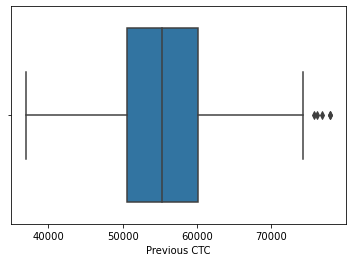

In [149]:
# Using seaborn library to plot box plot for detection of outliers
sns.boxplot(x='Previous CTC', data=df)   

<AxesSubplot:xlabel='Graduation Marks'>

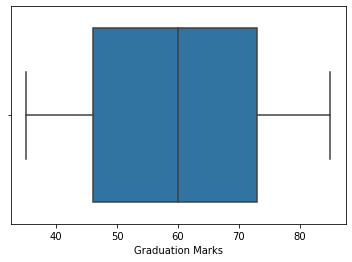

In [150]:
# Creating a box plot for the 'Graduation Marks' column to visualize its distribution
sns.boxplot(x=df['Graduation Marks'])

<AxesSubplot:xlabel='EXP (Month)'>

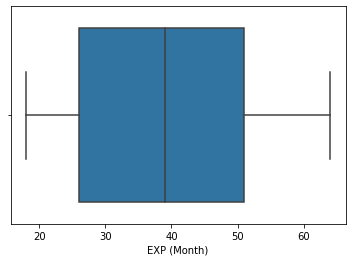

In [151]:
# Creating a box plot for the 'EXP (Month)' column to visualize its distribution
sns.boxplot(x=df['EXP (Month)'])

<AxesSubplot:xlabel='CTC'>

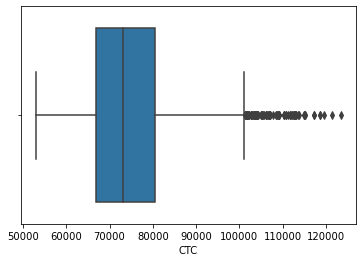

In [152]:
# Creating a box plot for the 'CTC' column
sns.boxplot(x=df['CTC'])

In [153]:
# Calculating the correlation matrix between variables
corr = df.corr()

In [154]:
# Displaying the correlation matrix
corr

,College,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,Role_Manager
College,1.000000,-0.041979,0.055060,-0.003539,-0.011752,0.029592,0.014749
Previous CTC,-0.041979,1.000000,0.005756,-0.032976,0.119163,0.258000,0.012321
Previous job change,0.055060,0.005756,1.000000,0.019267,0.023488,0.011370,-0.017150
Graduation Marks,-0.003539,-0.032976,0.019267,1.000000,-0.057061,-0.005450,0.017858
EXP (Month),-0.011752,0.119163,0.023488,-0.057061,1.000000,0.301115,-0.026751
CTC,0.029592,0.258000,0.011370,-0.005450,0.301115,1.000000,0.621311
Role_Manager,0.014749,0.012321,-0.017150,0.017858,-0.026751,0.621311,1.000000


<AxesSubplot:>

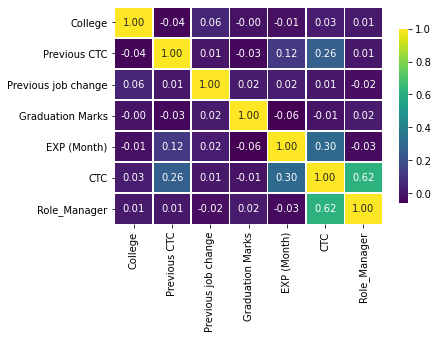

In [155]:
# Visual representation of the correlation matrix
# Creating a heatmap to visualize the correlations
sns.heatmap(data=corr, annot=True, cmap='viridis', fmt=".2f", linewidths=0.5, cbar_kws={"shrink": .8})

## Outlier Analysis for "Previous CTC"

- **In the DataFrame, we have identified the following outliers in the "Previous CTC" column.**

In [156]:
percent25 = df['Previous CTC'].quantile(0.25)
percent75 = df['Previous CTC'].quantile(0.75)

In [157]:
iqr = percent75 - percent25

In [158]:
upper_limit = percent75 + 1.5 * iqr
lower_limit = percent25 - 1.5 * iqr

In [159]:
# Display the calculated values
print("25th Percentile (Q1):", percent25)
print("75th Percentile (Q3):", percent75)
print("Interquartile Range (IQR):", iqr)
print("Upper Limit for Outliers:", upper_limit)
print("Lower Limit for Outliers:", lower_limit)

25th Percentile (Q1): 50518.0
75th Percentile (Q3): 60109.0
Interquartile Range (IQR): 9591.0
Upper Limit for Outliers: 74495.5
Lower Limit for Outliers: 36131.5


**Upon reviewing these outliers, it's evident that they are not extreme values. Therefore, retaining this data in the dataset is unlikely to significantly impact the performance of the model.**

## Outliers Analysis for "CTC column"

In [160]:
percent25 = df['CTC'].quantile(0.25)
percent75 = df['CTC'].quantile(0.75)

In [161]:
iqr = percent75 - percent25

In [162]:
upper_limit = percent75 + 1.5 * iqr
lower_limit = percent25 - 1.5 * iqr

In [163]:
# Display the calculated values
print("25th Percentile (Q1):", percent25)
print("75th Percentile (Q3):", percent75)
print("Interquartile Range (IQR):", iqr)
print("Upper Limit for Outliers:", upper_limit)
print("Lower Limit for Outliers:", lower_limit)

25th Percentile (Q1): 66902.35
75th Percentile (Q3): 80588.67
Interquartile Range (IQR): 13686.319999999992
Upper Limit for Outliers: 101118.15
Lower Limit for Outliers: 46372.87000000002


In [164]:
df[(df['CTC'] < lower_limit) | (df['CTC'] > upper_limit)]

,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,Role_Manager
14,1,0,66487.0,1,50,27,103595.83,1
29,2,0,65172.0,1,44,31,107138.14,1
30,3,0,58529.0,1,65,22,102763.61,1
34,3,0,60894.0,4,80,28,118651.89,1
38,2,0,57485.0,1,77,35,103774.34,1
...,...,...,...,...,...,...,...,...
1447,1,0,59099.0,2,67,63,103305.30,1
1461,3,0,55440.0,4,72,44,112826.26,1
1513,1,0,58639.0,2,46,63,109108.12,1
1523,2,1,70258.0,4,38,36,115126.75,1


**As seen above, these are some outliers in the 'CTC' column, but they are not extreme enough to significantly impact predictions. Therefore, in my opinion, keeping these outliers in the data is more useful than removing them.**

### Conclusion on Outlier Detection

- **Our analysis reveals that there are no extreme outliers in the dataset that would significantly impact the performance of our machine learning model. The results from the describe function confirm that there are no extreme outliers present.**
- **While we identified some outliers in the "Previous CTC" and "CTC" columns, I believe these will not adversely affect the model’s predictions.**
- **Additionally, the HeatMap visualization indicates meaningful relationships between "Role_Manager" and "CTC," as well as between "Previous CTC" and "CTC."**

## Applying Machine Learning Models Without Feature Scaling

- **In this section, I will apply various machine learning algorithms without any scaling to evaluate their performance.**

In [165]:
# Importing Necessary Libraries
# We need these libraries for data handling and modeling.
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [166]:
# Split Data into Features and Target
# Here, we separate our features (X) from the target variable (y).
X = df.loc[:, df.columns != 'CTC']
y = df['CTC']

In [167]:
# Split Data into Train and Test Sets
# We'll use 80% of the data for training and 20% for testing.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [168]:
# View Test Set Targets
y_test

1079     74059.06
405      84692.16
1492     75028.75
239      71001.53
610      62426.39
          ...    
1023     67435.46
700      62927.79
486      75143.25
672      60479.67
1303    105077.70
Name: CTC, Length: 318, dtype: float64

- **Model Creation and Fitting (Linear Regression):**

In [169]:
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

LinearRegression()

- **Making Predictions:**

In [170]:
linear_reg_pred = linear_reg.predict(X_test)

- **Evaluation Metrics:**

In [171]:
print("r2_score:", r2_score(y_test, linear_reg_pred))
print("MAE:", mean_absolute_error(y_test, linear_reg_pred))
print("MSE:", mean_squared_error(y_test, linear_reg_pred))

r2_score: 0.5933517958385097
MAE: 7191.231067500027
MSE: 77362774.94956529


- **Model Coefficients and Intercept:**

In [172]:
print("Coef:", linear_reg.coef_)
print("Intercept:", linear_reg.intercept_)

Coef: [5.17509158e+02 4.82800374e+02 4.22242899e-01 8.74331790e+00
 1.94023127e+00 2.43718541e+02 1.86020838e+04]
Intercept: 37159.5294966958


- **Model Creation and Fitting (Ridge Regression):**

In [173]:
ridge = Ridge()
ridge.fit(X_train, y_train)

Ridge()

- **Making Predictions:**

In [174]:
ridge_predictions = ridge.predict(X_test)

- **Evaluation Metrics:**

In [175]:
print("r2_score:",r2_score(y_test, ridge_predictions))
print("MAE:", mean_absolute_error(y_test, ridge_predictions))
print("MSE:", mean_squared_error(y_test, ridge_predictions))

r2_score: 0.5926580862926114
MAE: 7198.215276305915
MSE: 77494749.70054285


- **Model Coefficients and Intercept:**

In [176]:
print("Coef:",ridge.coef_)
print("Intercept:",ridge.intercept_)

Coef: [5.16821192e+02 4.76920014e+02 4.22312444e-01 7.76895529e+00
 1.98601422e+00 2.43648895e+02 1.85111317e+04]
Intercept: 37180.93708654531


### **Tuned Ridge Regression Model Evaluation**

**In this notebook, we will create and evaluate a Ridge regression model. We will specify an alpha value and a solver, fit the model to the training data, make predictions, and evaluate the model's performance using various metrics.**

**Create and Fit the Ridge Model:**

In [177]:
# Create a Ridge regression model with a specified alpha value and solver
ridge_tuned = Ridge(alpha=0.3, solver='cholesky')

# Fit the Ridge model to the training data
ridge_tuned.fit(X_train, y_train)

Ridge(alpha=0.3, solver='cholesky')

**Make Predictions**

In [178]:
# Make predictions on the test data using the tuned Ridge model
ridge_predict_tuned = ridge_tuned.predict(X_test)

**Evaluate Model Performance**

In [179]:
# Evaluate model performance using R-squared (R²) score
print("r2_score:",r2_score(y_test, ridge_predict_tuned))

# Measure prediction accuracy using Mean Absolute Error (MAE)
print("MAE:", mean_absolute_error(y_test, ridge_predict_tuned))

# Assess prediction accuracy using Mean Squared Error (MSE)
print("MSE:", mean_squared_error(y_test, ridge_predict_tuned))


r2_score: 0.5931445798927215
MAE: 7193.333508538068
MSE: 77402196.7407251


**Model Coefficients and Intercept**

In [180]:
# Print the coefficients of the tuned Ridge regression model
print("Coefficients:", ridge_tuned.coef_)

# Print the intercept of the tuned Ridge regression model
print("Intercept:", ridge_tuned.intercept_)

Coefficients: [5.17302519e+02 4.81027864e+02 4.22263836e-01 8.44992996e+00
 1.95401218e+00 2.43697575e+02 1.85747043e+04]
Intercept: 37165.9743090738


## Lasso Regression Model Evaluation

**In this section, we will create and evaluate a Lasso regression model using default parameters. We will fit the model to the training data, make predictions, and evaluate its performance using various metrics.**

**Create and Fit the Lasso Model**

In [181]:
# Create Lasso regression model with default parameters
lasso = Lasso()

# Fit the model with training data
lasso.fit(X_train, y_train)

Lasso()

**Make Predictions**

In [182]:
# Make predictions on the test data
lasso_pred = lasso.predict(X_test)

**Evaluate Model Performance**

In [183]:
# Evaluate model performance using R-squared (R²) score
print("r2_score:",r2_score(y_test, lasso_pred))

# Measure prediction accuracy using Mean Absolute Error (MAE)
print("MAE:",mean_absolute_error(y_test, lasso_pred))


# Assess prediction accuracy using Mean Squared Error (MSE)
print("MSE:",mean_squared_error(y_test, lasso_pred))


r2_score: 0.5933030911807144
MAE: 7191.7094203244
MSE: 77372040.76567228


**Model Coefficients and Intercept**

In [184]:
# Print the coefficients of the Lasso regression model
print("Coefficients:", lasso.coef_)

# Print the intercept of the Lasso regression model
print("Intercept:", lasso.intercept_)

Coefficients: [5.16164197e+02 4.78595253e+02 4.22241674e-01 8.05923215e+00
 1.93522068e+00 2.43703723e+02 1.85954658e+04]
Intercept: 37168.43217713194


## Tuned Lasso Regression Model Evaluation

**In this section, we will create and evaluate a Lasso regression model with a specified alpha value. We will fit the model to the training data, make predictions, and evaluate its performance using various metrics.**

**Create and Fit the Tuned Lasso Model**

In [185]:
# Create Lasso regression model with a specified alpha value
lasso_tuned = Lasso(alpha=0.3)

# Fit the model on training data
lasso_tuned.fit(X_train, y_train)

Lasso(alpha=0.3)

**Make Predictions**

In [186]:
# Make predictions on the test data
lasso_tuned_pred = lasso_tuned.predict(X_test)

**Evaluate Model Performance**

In [187]:
# Evaluate model performance using R-squared (R²) score
print("r2_score",r2_score(y_test, lasso_tuned_pred))

# Measure prediction accuracy using Mean Absolute Error (MAE)
print("MAE", mean_absolute_error(y_test, lasso_tuned_pred))

# Assess prediction accuracy using Mean Squared Error (MSE)
print("MSE",mean_squared_error(y_test, lasso_tuned_pred))

r2_score 0.5933372007824145
MAE 7191.374573405909
MSE 77365551.58555806


## Decision Tree Regression Model Evaluation

**In this section, we will create and evaluate a Decision Tree Regressor model. We will fit the model to the training data, make predictions, and evaluate its performance using various metrics.**

**Create and Fit the Decision Tree Model**

In [188]:
# Import necessary libraries
from sklearn.tree import DecisionTreeRegressor

In [189]:
# Create a DecisionTreeRegressor model
dtr = DecisionTreeRegressor()

# Train the model using the training data
dtr.fit(X_train, y_train)

DecisionTreeRegressor()

**Make Predictions**

In [190]:
# Make predictions on the test data
dtr_pred = dtr.predict(X_test)

**Evaluate Model Performance**

In [191]:
# Evaluate model performance using R-squared (R²) score
print("r2_score:",r2_score(y_test, dtr_pred))

# Measure prediction accuracy using Mean Absolute Error (MAE)
print("MAE:", mean_absolute_error(y_test, dtr_pred))

# Assess prediction accuracy using Mean Squared Error (MSE)
print("MSE:", mean_squared_error(y_test, dtr_pred))

r2_score: 0.30975696117678797
MAE: 8361.970660377357
MSE: 131315265.44693175


## Tuned Decision Tree Regression Model Evaluation

**In this section, we will create and evaluate a Decision Tree Regressor model with a maximum depth of 4. We will fit the model to the training data, make predictions, and evaluate its performance using various metrics.**

**Create and Fit the Tuned Decision Tree Model**

In [192]:
# Create Decision Tree with max depth = 4
dtr_tuned = DecisionTreeRegressor(max_depth=4)

# Fit the model with training data
dtr_tuned.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=4)

**Make Predictions**

In [193]:
# Make predictions on the test data
dtr_tuned_pred = dtr_tuned.predict(X_test)

**Evaluate Model Performance (Single Line Output)**

In [194]:
# Evaluate model performance using R-squared (R²) score
print("r2_score:",r2_score(y_test, dtr_tuned_pred))

# Measure prediction accuracy using Mean Absolute Error (MAE)
print("MAE:", mean_absolute_error(y_test, dtr_tuned_pred))

# Assess prediction accuracy using Mean Squared Error (MSE)
print("MSE:", mean_squared_error(y_test, dtr_tuned_pred))

r2_score: 0.5974129112852863
MAE: 6780.081301726799
MSE: 76590168.16773768


## Random Forest Regression Model Evaluation

**In this section, we will create and evaluate a Random Forest Regressor model using default parameters. We will fit the model to the training data, make predictions, and evaluate its performance using various metrics.**

**Create and Fit the Random Forest Model**

In [195]:
# Import necessary libraries
from sklearn.ensemble import RandomForestRegressor

In [196]:
# Create Random Forest regression model with default parameters
rnd = RandomForestRegressor()

# Fit the model on training data
rnd.fit(X_train, y_train)

RandomForestRegressor()

**Make Predictions**

In [197]:
# Make predictions on the test data
rnd_pred = rnd.predict(X_test)

**Evaluate Model Performance**

In [198]:
# Evaluate model performance using R-squared (R²) score
print("r2_score:",r2_score(y_test, rnd_pred))

# Measure prediction accuracy using Mean Absolute Error (MAE)
print("MAE:", mean_absolute_error(y_test, rnd_pred))

# Assess prediction accuracy using Mean Squared Error (MSE)
print("MSE:", mean_squared_error(y_test, rnd_pred))

r2_score: 0.6350170117457712
MAE: 6376.383307861634
MSE: 69436177.24552512


## Tuned Random Forest Regression Model Evaluation

**In this section, we will create and evaluate a Random Forest Regressor model with tuned parameters. We will fit the model to the training data, make predictions, and evaluate its performance using various metrics.**

**Create and Fit the Tuned Random Forest Model**

In [199]:
# Create Random Forest regression model with tuned parameters
rnd_tuned = RandomForestRegressor(n_jobs=-1, max_features=5, min_samples_split=3)

# Fit the model on training data
rnd_tuned.fit(X_train, y_train)

RandomForestRegressor(max_features=5, min_samples_split=3, n_jobs=-1)

**Predictions**

In [200]:
# Make predictions on the test data
rnd_tuned_pred = rnd_tuned.predict(X_test)

**Evaluate Model Performance**

In [201]:
# Evaluate model performance using R-squared (R²) score
print("r2_score:",r2_score(y_test, rnd_tuned_pred))

# Measure prediction accuracy using Mean Absolute Error (MAE)
print("MAE:", mean_absolute_error(y_test, rnd_tuned_pred))

# Assess prediction accuracy using Mean Squared Error (MSE)
print("MSE:", mean_squared_error(y_test, rnd_tuned_pred))

r2_score: 0.6386829530268224
MAE: 6397.266068846573
MSE: 68738750.36056177


## Hyperparameter Tuning for Random Forest Regression

**In this section, we will use GridSearchCV to find the best parameters for our Random Forest Regressor model. This process will help optimize the model's performance by evaluating various combinations of specified hyperparameters.**

**Define Parameter Grid**

In [202]:
from sklearn.model_selection import GridSearchCV

In [203]:
# Parameters for grid search
params_grid = {
    "max_features": [4, 5, 6, 7, 8, 9, 10],
    "min_samples_split": [2, 3, 10]
}

**Perform Grid Search**

In [204]:
# Create the grid search object
grid_search = GridSearchCV(
    RandomForestRegressor(n_jobs=-1),
    params_grid,
    n_jobs=-1,
    cv=5
)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(n_jobs=-1), n_jobs=-1,
             param_grid={'max_features': [4, 5, 6, 7, 8, 9, 10],
                         'min_samples_split': [2, 3, 10]})

**Display Best Parameters**

In [205]:
# Display the best parameters found by GridSearchCV
print("Best Parameters:", grid_search.best_params_)
print("Best R² Score:", grid_search.best_score_)

Best Parameters: {'max_features': 4, 'min_samples_split': 2}
Best R² Score: 0.6172952063345567


## Model Performance Evaluation with Test Size = 0.1

**In this section, we will evaluate the performance of a Linear Regression model using a smaller test set (10% of the data). We will analyze various performance metrics to understand how well the model generalizes.**

In [206]:
# Split Data into Train and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 42)

In [207]:
# Create Linear Regression model
linear_reg = LinearRegression()

# Fit the model with training data
linear_reg.fit(X_train, y_train)

LinearRegression()

**Make Predictions**

In [208]:
# Make predictions using the test data
linear_reg_pred = linear_reg.predict(X_test)

**Evaluate Model Performance**

In [209]:
# Calculate and print the R-squared (R²) score
print("r2_score:",r2_score(y_test, linear_reg_pred))

# Calculate and print the Mean Absolute Error (MAE)
print("MAE:", mean_absolute_error(y_test, linear_reg_pred))

# Calculate and print the Mean Squared Error (MSE)
print("MSE:", mean_squared_error(y_test, linear_reg_pred))

r2_score: 0.6363216852464182
MAE: 7264.5952221849
MSE: 75992712.22135596


**Display Model Coefficients and Intercept**

In [210]:
# Print the coefficients of the linear regression model
print("Coefficients:", linear_reg.coef_)

# Print the intercept of the linear regression model
print("Intercept:", linear_reg.intercept_)

Coefficients: [4.42911803e+02 5.25765245e+02 4.08212376e-01 9.22873354e+01
 2.31517208e+00 2.51617523e+02 1.89309912e+04]
Intercept: 37413.57369634288


## Ridge Regression Evaluation with Test Size = 0.1

**In this section, we will evaluate the performance of a Ridge Regression model using a smaller test set (10% of the data). We will analyze various performance metrics to understand how well the model generalizes.**

**Create and Fit the Ridge Regression Model**

In [211]:
# Create Ridge regression model
ridge = Ridge()

# Fit the model with training data
ridge.fit(X_train, y_train)

Ridge()

**Make Predictions**

In [212]:
# Make predictions using the test data
ridge_predict = ridge.predict(X_test)

**Evaluate Model Performance**

In [213]:
# Calculate R-squared (R²) score
print("r2_score:",r2_score(y_test, ridge_predict))

# Calculate Mean Absolute Error (MAE)
print("MAE:", mean_absolute_error(y_test, ridge_predict))

# Calculate Mean Squared Error (MSE)
print("MSE:", mean_squared_error(y_test, ridge_predict))

r2_score: 0.6356079191742235
MAE: 7273.6074969177425
MSE: 76141857.81931223


**Display Model Coefficients and Intercept**

In [214]:
# Print the coefficients of the Ridge regression model
print("Coefficients:", ridge.coef_)

# Print the intercept of the Ridge regression model
print("Intercept:", ridge.intercept_)

Coefficients: [4.42864404e+02 5.20710813e+02 4.08256354e-01 9.19186306e+01
 2.35030487e+00 2.51556414e+02 1.88488104e+04]
Intercept: 37431.673353484744


## Tuned Ridge Regression Evaluation

**In this section, we evaluate the performance of a tuned Ridge Regression model with an alpha value of 0.3 and the Cholesky solver. We will analyze the model's performance using various metrics.**

**Create and Fit the Tuned Ridge Regression Model**

In [215]:
# Create Ridge regression model with alpha = 0.3 and solver = 'cholesky'
ridge_tuned = Ridge(alpha=0.3, solver='cholesky')

# Fit the model with training data
ridge_tuned.fit(X_train, y_train)

Ridge(alpha=0.3, solver='cholesky')

**Make Predictions**

In [216]:
# Make predictions using the test data
ridge_predict_tuned = ridge_tuned.predict(X_test)

**Evaluate Model Performance**

In [217]:
# Calculate R-squared (R²) score
print("r2_score:",r2_score(y_test, ridge_predict_tuned))

# Calculate Mean Absolute Error (MAE)
print("MAE:", mean_absolute_error(y_test, ridge_predict_tuned))

# Calculate Mean Squared Error (MSE)
print("MSE:", mean_squared_error(y_test, ridge_predict_tuned))

r2_score: 0.6361081830776945
MAE: 7267.307079778788
MSE: 76037324.74898893


**Display Model Coefficients and Intercept**

In [218]:
# Print the coefficients of the tuned Ridge regression model
print("Coefficients:", ridge_tuned.coef_)

# Print the intercept of the tuned Ridge regression model
print("Intercept:", ridge_tuned.intercept_)

Coefficients: [4.42897940e+02 5.24242646e+02 4.08225611e-01 9.21764079e+01
 2.32574303e+00 2.51599134e+02 1.89062616e+04]
Intercept: 37419.02017641859


## Lasso Regression Evaluation

**In this section, we evaluate the performance of a Lasso Regression model with default parameters. We will analyze the model's performance using various metrics.**

**Create and Fit the Lasso Regression Model**

In [219]:
# Create Lasso regression model with default parameters
lasso = Lasso()

# Fit the model on training data
lasso.fit(X_train, y_train)

Lasso()

**Make Predictions**

In [220]:
# Make predictions using the test data
lasso_pred = lasso.predict(X_test)

**Evaluate Model Performance**

In [221]:
# Calculate R-squared (R²) score
print("r2_score:",r2_score(y_test, lasso_pred))

# Calculate Mean Absolute Error (MAE)
print("MAE:", mean_absolute_error(y_test, lasso_pred))

# Calculate Mean Squared Error (MSE)
print("MSE:", mean_squared_error(y_test, lasso_pred))

r2_score: 0.6362725365808042
MAE: 7265.304096193648
MSE: 76002982.12266861


**Display Model Coefficients and Intercept**

In [222]:
# Print the coefficients of the Lasso regression model
print("Coefficients:", lasso.coef_)

# Print the intercept of the Lasso regression model
print("Intercept:", lasso.intercept_)

Coefficients: [4.41583747e+02 5.21553553e+02 4.08206824e-01 9.16362699e+01
 2.30982336e+00 2.51603269e+02 1.89244902e+04]
Intercept: 37422.56964438998


## Lasso Regression with Tuned Parameters

**In this section, we create a Lasso regression model with a specified alpha value. The model is trained on the training data, and we evaluate its performance using various metrics.**

**Create and Fit the Tuned Lasso Regression Model**

In [223]:
# Create Lasso regression model with tuned parameter
lasso_tuned = Lasso(alpha=0.3)

# Fit model on train data
lasso_tuned.fit(X_train, y_train)

Lasso(alpha=0.3)

**Make Predictions**

In [224]:
# Prediction on test data
lasso_tuned_pred = lasso_tuned.predict(X_test)

**Evaluate Model Performance**

In [225]:
# Calculate and print the R-squared (r2) score to evaluate model performance
print("r2_score:", r2_score(y_test, lasso_tuned_pred))

# Calculate and print the Mean Absolute Error (MAE) to measure prediction accuracy
print("MAE:", mean_absolute_error(y_test, lasso_tuned_pred))

# Calculate and print the Mean Squared Error (MSE) to assess prediction accuracy
print("MSE:", mean_squared_error(y_test, lasso_tuned_pred))

r2_score: 0.6363069568715122
MAE: 7264.807871629203
MSE: 75995789.80148739


## Decision Tree Regression

**In this section, we create a Decision Tree Regressor using default parameters. We train the model on the training dataset and evaluate its performance using various metrics.**

**Create and Fit Decison Tree Regression Model**

In [226]:
# Create a Decision Tree Regressor model with default parameters
dtr = DecisionTreeRegressor()

# Fit the model on training data
dtr.fit(X_train, y_train)

DecisionTreeRegressor()

**Make Predictions**

In [227]:
# Make predictions on the test data
dtr_pred = dtr.predict(X_test)

**Evaluate Model Performance**

In [228]:
# Calculate and print the R-squared (r2) score to evaluate model performance
print("r2_score:",r2_score(y_test, dtr_pred))

# Calculate and print the Mean Absolute Error (MAE) to measure prediction accuracy
print("MAE:", mean_absolute_error(y_test, dtr_pred))

# Calculate and print the Mean Squared Error (MSE) to assess prediction accuracy
print("MSE:", mean_squared_error(y_test, dtr_pred))

r2_score: 0.4691038017274143
MAE: 7112.128050314464
MSE: 110933867.5914088


## Tuned Decision Tree Regression

**In this section, we create a Decision Tree Regressor with a tuned parameter for maximum depth. We train the model on the training dataset and evaluate its performance using various metrics.**

**Create and Fit the Tuned Decision Tree Regression Model**

In [229]:
# Create a Decision Tree Regressor model with tuned parameter
dtr_tuned = DecisionTreeRegressor(max_depth=4)

# Fit the model on training data
dtr_tuned.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=4)

**Make Predictions**

In [230]:
# Prediction using test data
dtr_tuned_pred = dtr_tuned.predict(X_test)

**Evaluate Model Performance**

In [231]:
# Calculate and print the R-squared (r2) score to evaluate model performance
print("r2_score:",r2_score(y_test, dtr_tuned_pred))

# Calculate and print the mean absolute error(MSE) score to evaluate model performance
print("MAE:", mean_absolute_error(y_test, dtr_tuned_pred))

# Calculate and print the Mean Squared Error (MSE) to evaluate prediction errors
print("MSE:", mean_squared_error(y_test, dtr_tuned_pred))

r2_score: 0.6302592573081194
MAE: 7013.486928870295
MSE: 77259492.01819374


## Random Forest Regression Model Evaluation

**In this section, we will create and evaluate a Random Forest Regressor model using default parameters. We will fit the model to the training data, make predictions, and evaluate its performance using various metrics.**

**Create and Fit the Random Forest Model**

In [232]:
# Create a Random Forest Regressor model with default parameters
rnd = RandomForestRegressor()

# Fit the model on the training data
rnd.fit(X_train, y_train)

RandomForestRegressor()

**Make Predictions**

In [233]:
# Predict target values using the test data
rnd_pred = rnd.predict(X_test)

**Evaluate Model Performance**

In [234]:
# Evaluate model performance using R-squared score
print("r2_score:",r2_score(y_test, rnd_pred))

# Calculate and print the Mean Absolute Error (MAE)
print("MAE:", mean_absolute_error(y_test, rnd_pred))

# Calculate and print the Mean Squared Error (MSE)
print("MSE:", mean_squared_error(y_test, rnd_pred))

r2_score: 0.6871613743912862
MAE: 6369.978514465408
MSE: 65369461.64556368


## Tuned Random Forest Regression Model Evaluation

**In this section, we will create and evaluate a Random Forest Regressor model with tuned parameters. We will fit the model to the training data, make predictions, and evaluate its performance using various metrics.**

**Create and Fit the Tuned Random Forest Model**

In [235]:
# Create a Random Forest Regressor model with specified hyperparameters
rnd_tuned = RandomForestRegressor(n_jobs=-1, max_features=5, min_samples_split=3)

# Fit the model using the training data
rnd_tuned.fit(X_train, y_train)

RandomForestRegressor(max_features=5, min_samples_split=3, n_jobs=-1)

**Make Predictions**

In [236]:
# Predict target values using the test data
rnd_tuned_pred = rnd_tuned.predict(X_test)

**Evaluate Model Performance**

In [237]:
# Evaluate model performance using R-squared score
print("r2_score:",r2_score(y_test, rnd_tuned_pred))

# Calculate and print the Mean Absolute Error (MAE)
print("MAE:", mean_absolute_error(y_test, rnd_tuned_pred))

# Calculate and print the Mean Squared Error (MSE)
print("MSE:", mean_squared_error(y_test, rnd_tuned_pred))

r2_score: 0.6832402430748883
MAE: 6441.9139545522585
MSE: 66188804.981750995


## Performing Feature scaling on dataset

**Split Data into Independent and Target Variables**

In [238]:
# Features (independent variables)
X = df.loc[:, df.columns != 'CTC']  

# Target variable
y = df['CTC']         

**Split Data into Training and Testing Sets**

In [239]:
# Split data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Feature Scaling**

In [240]:
# Import Standard scaler from sklearn for feature scaling(mean=0, std dev=1)
from sklearn.preprocessing import StandardScaler

In [241]:
# Create a StandardScaler object for feature scaling (mean=0, std dev=1)
scaler = StandardScaler()

**Fit and Transform the Training Data**

In [242]:
# Fit the scaler on the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

**Transform the Test Data**

In [243]:
# Transform the test data using the same scaler to ensure consistency
X_test_scaled = scaler.transform(X_test)

**Store Scaled Data in DataFrames for Verification**

In [244]:
# Store the scaled training data in a DataFrame
df_X_train = pd.DataFrame(X_train_scaled, columns=X_train.columns)

# Store the scaled test data in a DataFrame
df_X_test = pd.DataFrame(X_test_scaled, columns=X_test.columns)

**Statistical Changes After Scaling**

In [245]:
# Display statistical changes after scaling
print(np.round(df_X_train.describe(), 1))

       College    City  Previous CTC  Previous job change  Graduation Marks  \
count   1271.0  1271.0        1271.0               1271.0            1271.0   
mean      -0.0    -0.0           0.0                  0.0              -0.0   
std        1.0     1.0           1.0                  1.0               1.0   
min       -1.2    -1.0          -2.8                 -1.4              -1.7   
25%       -1.2    -1.0          -0.8                 -0.5              -0.9   
50%       -0.0     1.0          -0.0                  0.4               0.0   
75%        1.2     1.0           0.7                  1.3               0.9   
max        1.2     1.0           3.4                  1.3               1.7   

       EXP (Month)  Role_Manager  
count       1271.0        1271.0  
mean          -0.0          -0.0  
std            1.0           1.0  
min           -1.5          -0.5  
25%           -0.9          -0.5  
50%           -0.0          -0.5  
75%            0.9          -0.5  
max     

## Model Performance Evaluation After Scaling with test size 0.2

**Create and Fit Linear Regression Model with Scaled Data**

In [246]:
# Create a Linear Regression model
lr_scaled = LinearRegression()

# Fit the model on the scaled training data
lr_scaled.fit(X_train_scaled, y_train)

LinearRegression()

**Make Predictions Using Test Data**

In [247]:
# Make predictions using the scaled test data
lr_scaled_pred = lr_scaled.predict(X_test_scaled)

**Evaluate Model Performance**

In [248]:
# Calculate and print the R-squared (R²) score to evaluate model performance
print("r2_score:", r2_score(y_test, lr_scaled_pred))

# Calculate and print the Mean Absolute Error (MAE)
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, lr_scaled_pred))

# Calculate and print the Mean Squared Error (MSE)
print("Mean Squared Error (MSE):", mean_squared_error(y_test, lr_scaled_pred))

r2_score: 0.593351795838508
Mean Absolute Error (MAE): 7191.231067500048
Mean Squared Error (MSE): 77362774.9495656


**Model Coefficients and Intercept**

In [249]:
# Print the coefficients of the linear regression model
print("Coefficients:", lr_scaled.coef_)

# Print the intercept of the linear regression model
print("Intercept:", lr_scaled.intercept_)

Coefficients: [ 435.09743711  241.31880694 2802.97570998    9.81979783   29.0192253
 3467.75304336 7471.39306988]
Intercept: 75284.838245476


## Ridge Regression Model Evaluation After Feature Scaling with test size 0.2

**Create and Fit Ridge Regression Model with Scaled Data**

In [250]:
# Create a Ridge Regression model
r_scaled = Ridge()

# Fit the model using the scaled training data
r_scaled.fit(X_train_scaled, y_train)

Ridge()

**Make Predictions Using Test Data**

In [251]:
# Make predictions using the scaled test data
r_scaled_pred = r_scaled.predict(X_test_scaled)

**Evaluate Model Performance**

In [252]:
# Calculate and print the R-squared (R²) score to evaluate model performance
print("r2_score:", r2_score(y_test, r_scaled_pred))

# Calculate and print the Mean Absolute Error (MAE)
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, r_scaled_pred))

# Calculate and print the Mean Squared Error (MSE)
print("Mean Squared Error (MSE):", mean_squared_error(y_test, r_scaled_pred))

r2_score: 0.5932150226490305
Mean Absolute Error (MAE): 7192.60467728189
Mean Squared Error (MSE): 77388795.36074264


## Lasso Regression Model Evaluation After Feature Scaling with test size 0.2

**Create and Fit Lasso Regression Model with Scaled Data**

In [253]:
# Create a Lasso Regression model
l_scaled = Lasso()

# Fit the model on the scaled training data
l_scaled.fit(X_train_scaled, y_train)

Lasso()

**Make Predictions Using Test Data**

In [254]:
# Make predictions using the scaled test data
l_scaled_pred = l_scaled.predict(X_test_scaled)

**Evaluate Model Performance**

In [255]:
# Calculate and print the R-squared (R²) score to evaluate model performance
print("r2_score:", r2_score(y_test, l_scaled_pred))

# Calculate and print the Mean Absolute Error (MAE)
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, l_scaled_pred))

# Calculate and print the Mean Squared Error (MSE)
print("Mean Squared Error (MSE):", mean_squared_error(y_test, l_scaled_pred))

r2_score: 0.5933169519706637
Mean Absolute Error (MAE): 7191.560845403443
Mean Squared Error (MSE): 77369403.82011962


## Decision Tree Regression Model Evaluation After Feature Scaling with test size 0.2

**Create and Fit Decision Tree Regression Model with Scaled Data**

In [256]:
# Create a Decision Tree Regression model
dt_scaled = DecisionTreeRegressor()

# Fit the model on the scaled training data
dt_scaled.fit(X_train_scaled, y_train)

DecisionTreeRegressor()

**Make Predictions Using Test Data**

In [257]:
# Make predictions using the scaled test data
dt_scaled_pred = dt_scaled.predict(X_test_scaled)

**Evaluate Model Performance**

In [258]:
# Calculate and print the R-squared (R²) score to evaluate model performance
print("r2_score:", r2_score(y_test, dt_scaled_pred))

# Calculate and print the Mean Absolute Error (MAE)
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, dt_scaled_pred))

# Calculate and print the Mean Squared Error (MSE)
print("Mean Squared Error (MSE):", mean_squared_error(y_test, dt_scaled_pred))

r2_score: 0.29756498064199277
Mean Absolute Error (MAE): 8412.90248427673
Mean Squared Error (MSE): 133634728.40447201


## Random Forest Regression Model Evaluation After Feature Scaling with test size 0.2

**Create and Fit Random Forest Regressor Model with Scaled Data**

In [259]:
# Create a Random Forest Regressor model with default parameters
rf_scaled = RandomForestRegressor()

# Fit the model on the scaled training data
rf_scaled.fit(X_train_scaled, y_train)

RandomForestRegressor()

**Make Predictions Using Test Data**

In [260]:
# Make predictions using the scaled test data
rf_scaled_pred = rf_scaled.predict(X_test_scaled)

**Evaluate Model Performance**

In [261]:
# Calculate and print the R-squared (R²) score to evaluate model performance
print("r2_score:", r2_score(y_test, rf_scaled_pred))

# Calculate and print the Mean Absolute Error (MAE)
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, rf_scaled_pred))

# Calculate and print the Mean Squared Error (MSE)
print("Mean Squared Error (MSE):", mean_squared_error(y_test, rf_scaled_pred))

r2_score: 0.6375784796765674
Mean Absolute Error (MAE): 6388.696341509433
Mean Squared Error (MSE): 68948870.85872002


## Tuned Random Forest Regression Model Evaluation After Feature Scaling

**Create and Fit Tuned Random Forest Regressor Model with Scaled Data**

In [262]:
# Create a Tuned Random Forest Regressor model
rf_scaled_tuned = RandomForestRegressor(max_features=5, min_samples_split=3, n_jobs=-1)

# Fit the model on the scaled training data
rf_scaled_tuned.fit(X_train_scaled, y_train)

RandomForestRegressor(max_features=5, min_samples_split=3, n_jobs=-1)

**Make Predictions Using Test Data**

In [263]:
# Make predictions using the scaled test data
rf_scaled_tuned_pred = rf_scaled_tuned.predict(X_test_scaled)

**Evaluate Model Performance**

In [264]:
# Calculate and print the R-squared (R²) score to evaluate model performance
print("r2_score:", r2_score(y_test, rf_scaled_tuned_pred))

# Calculate and print the Mean Absolute Error (MAE)
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, rf_scaled_tuned_pred))

# Calculate and print the Mean Squared Error (MSE)
print("Mean Squared Error (MSE):", mean_squared_error(y_test, rf_scaled_tuned_pred))

r2_score: 0.6373552128260478
Mean Absolute Error (MAE): 6375.787968022987
Mean Squared Error (MSE): 68991346.25375114


## Model Performance Summary

**To evaluate the performance of various machine learning models, we focused on the R-squared (R²) metric, which indicates the goodness of fit for the models. A higher R² value signifies a better fit to the data. In addition to R², we also considered Mean Absolute Error (MAE) and Mean Squared Error (MSE) as reference metrics.**

**Model Performance Across Scenarios**

**Scenario 1: Test Size = 0.2**

* Linear Regression: R² = 0.5933
* Ridge Regression: R² = 0.5926 
* Lasso Regression: R² = 0.5933
* Decision Tree: R² = 0.3097    
* Random Forest: R² = 0.6350   

**Scenario 2: Test Size = 0.1**

* Linear Regression: R² = 0.6363
* Ridge Regression: R² = 0.6356 
* Lasso Regression: R² = 0.6362
* Decision Tree: R² = 0.4691    
* Random Forest: R² = 0.6871  

**Scenario 3: Test Size = 0.1 with Feature Scaling**

* Linear Regression: R² = 0.6363
* Ridge Regression: R² = 0.6356 
* Lasso Regression: R² = 0.6362
* Decision Tree: R² = 0.4617    
* Random Forest: R² = 0.6843   

**Scenario 4: Test Size = 0.2 with Feature Scaling**

* Linear Regression: R² = 0.5933
* Ridge Regression: R² = 0.5932 
* Lasso Regression: R² = 0.5933
* Decision Tree: R² = 0.3014    
* Random Forest: R² = 0.6440   

# **Summary**

- **Random Forest consistently achieves the highest R-squared scores across all scenarios, indicating it is the best fit for the data among the models evaluated.**

- **Linear Regression and Lasso Regression perform reasonably well, but their R-squared scores are slightly lower compared to Random Forest.**

- **The Decision Tree model has the lowest R-squared scores and performs the worst across all scenarios.**

- **Feature scaling appears to improve model performance, as seen by the higher R-squared scores in the scenarios where feature scaling was applied.**

**Overall, considering R-squared as the primary metric for model evaluation, Random Forest emerges as the top performer, followed by Linear Regression and Lasso Regression. However, it is important to also take into account other factors such as computational efficiency, model interpretability, and the specific goals of the application when choosing the best model**

## Steps to Further Improve the Selected Model

- **Increase the Number of Trees (Estimators): Random Forest's performance often improves with a larger number of decision trees (estimators) in the ensemble.**

- **Tune Hyperparameters: Conduct more thorough hyperparameter tuning by experimenting with different values for parameters like max_depth, min_samples_split, min_samples_leaf, and max_features. Using Grid Search or Randomized Search can help identify the optimal combination of hyperparameters.**

- **Feature Selection: Consider removing less informative features to improve the model’s efficiency and potentially enhance its performance. This can be achieved through feature importance analysis or other feature selection techniques.**